In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving BlinkIT Grocery Data.xlsx to BlinkIT Grocery Data.xlsx


In [4]:
df = pd.read_excel(list(uploaded.keys())[0], sheet_name='BlinkIT Grocery Data')

In [5]:
df.dropna(inplace=True)  # Drop missing values if any
df['Item Fat Content'] = df['Item Fat Content'].str.strip().replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})

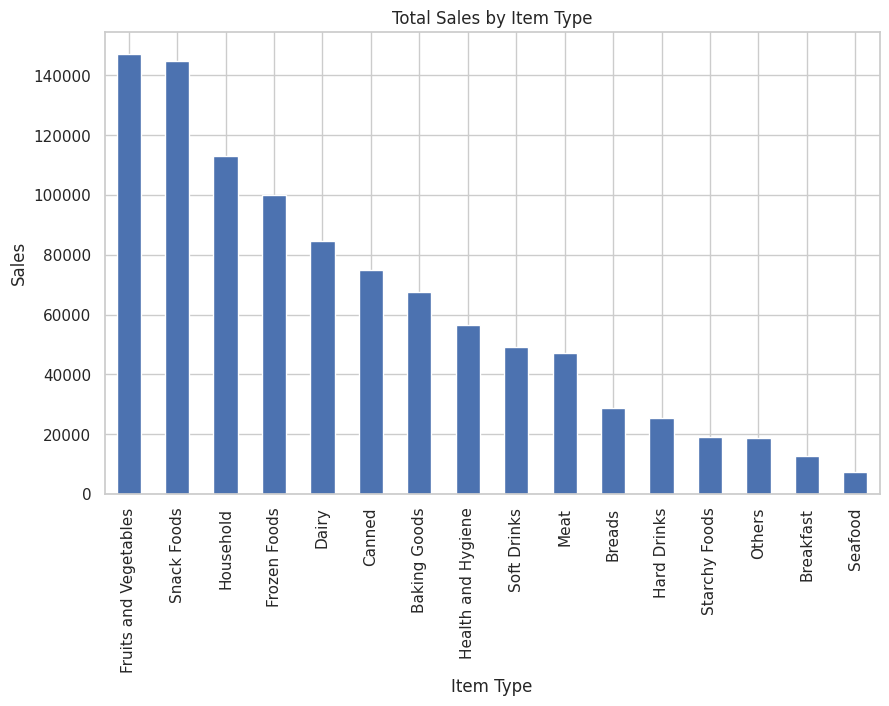

In [6]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
sales_by_type.plot(kind='bar', title='Total Sales by Item Type')
plt.ylabel("Sales")
plt.show()
# 1. Top-selling Item Types

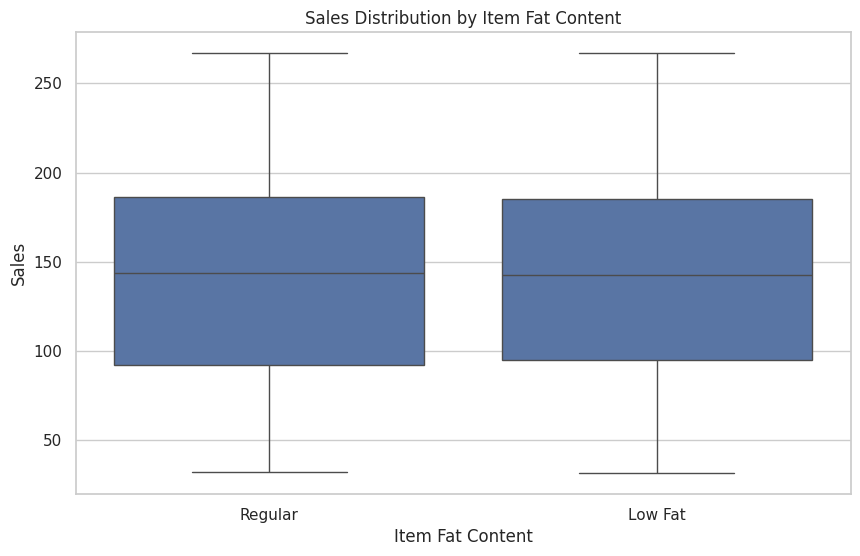

In [7]:
# 2. Sales by Item Fat Content
sns.boxplot(data=df, x='Item Fat Content', y='Sales')
plt.title("Sales Distribution by Item Fat Content")
plt.show()

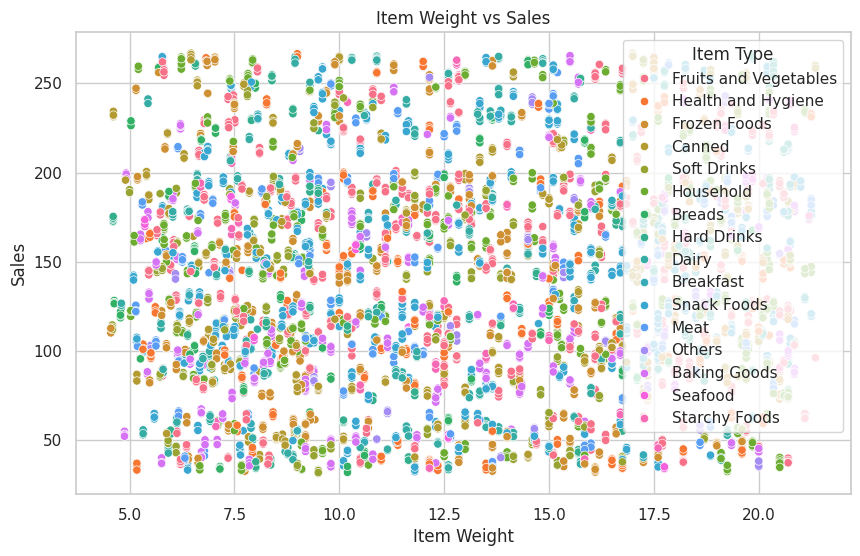

In [8]:
# 3. Correlation: Item Weight vs Sales
sns.scatterplot(data=df, x='Item Weight', y='Sales', hue='Item Type')
plt.title("Item Weight vs Sales")
plt.show()

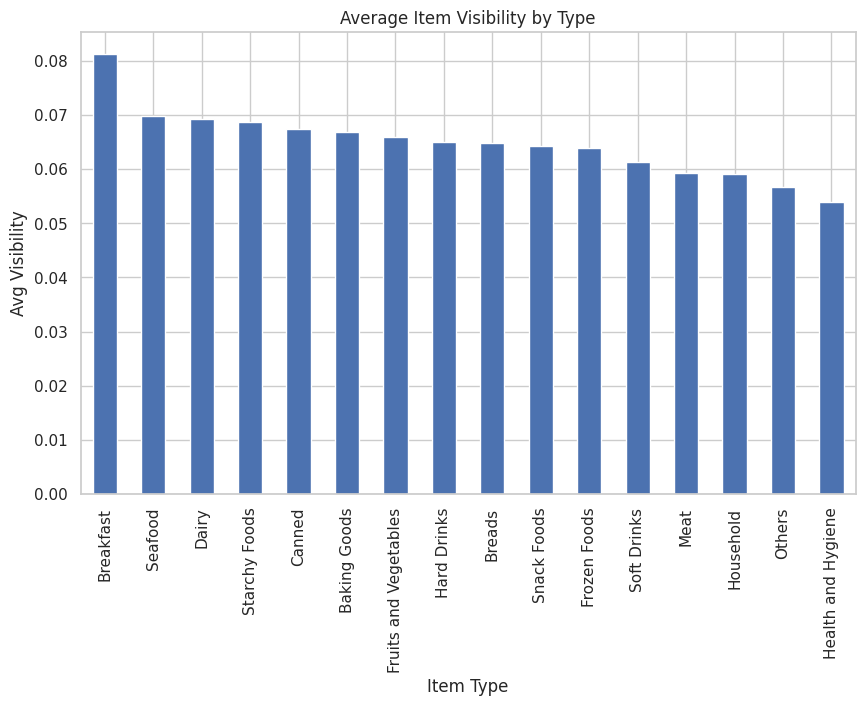

In [9]:
# 4. Visibility across Item Types
visibility_by_type = df.groupby('Item Type')['Item Visibility'].mean().sort_values(ascending=False)
visibility_by_type.plot(kind='bar', title='Average Item Visibility by Type')
plt.ylabel("Avg Visibility")
plt.show()

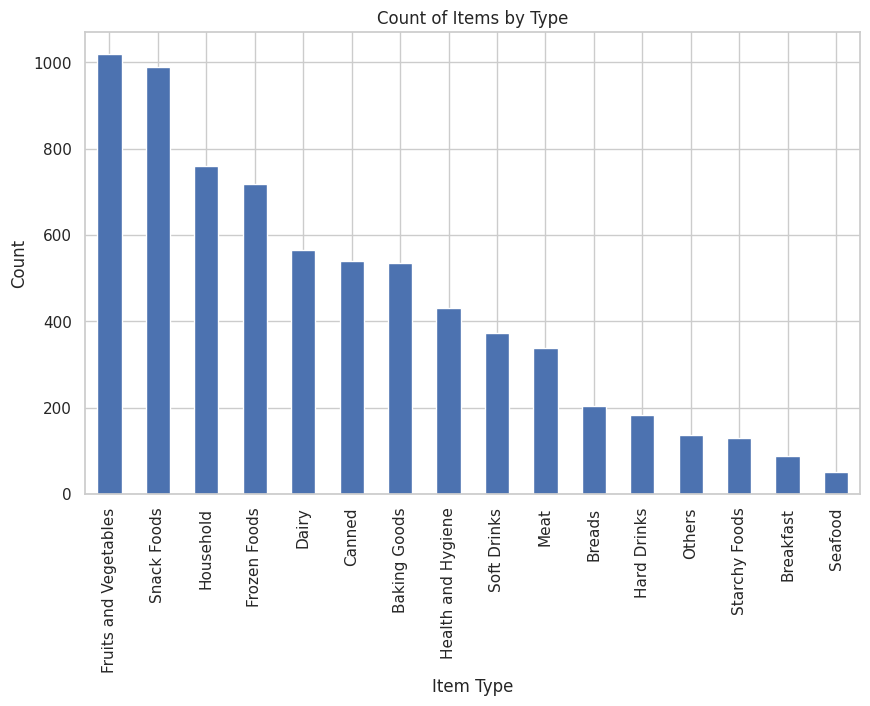

In [10]:
# 5. Most Sold Item Types
count_by_type = df['Item Type'].value_counts()
count_by_type.plot(kind='bar', title='Count of Items by Type')
plt.ylabel("Count")
plt.show()

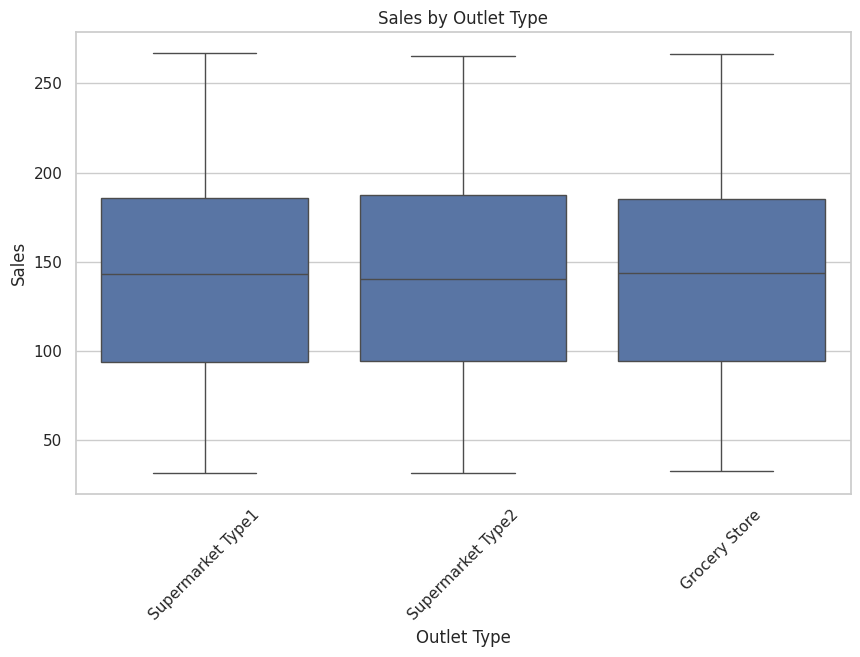

In [11]:
# 6. Sales by Outlet Type
sns.boxplot(data=df, x='Outlet Type', y='Sales')
plt.title("Sales by Outlet Type")
plt.xticks(rotation=45)
plt.show()

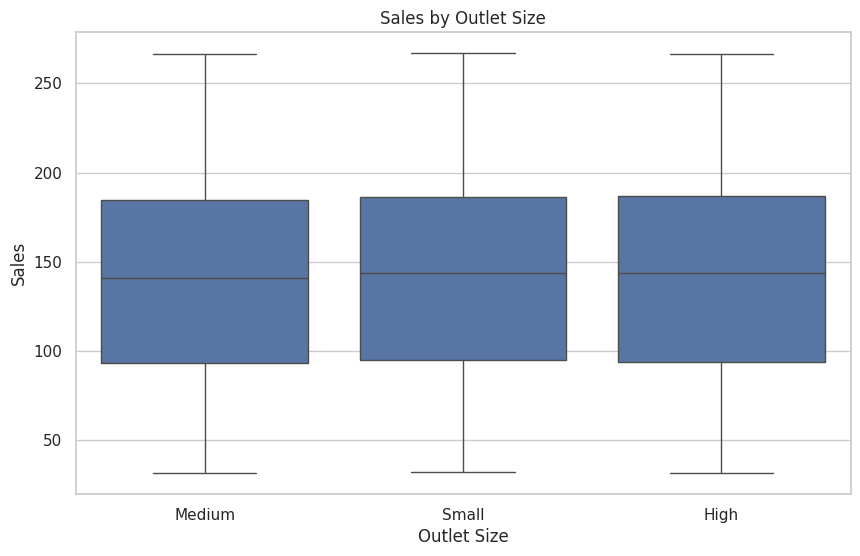

In [12]:
# 7. Sales by Outlet Size
sns.boxplot(data=df, x='Outlet Size', y='Sales')
plt.title("Sales by Outlet Size")
plt.show()

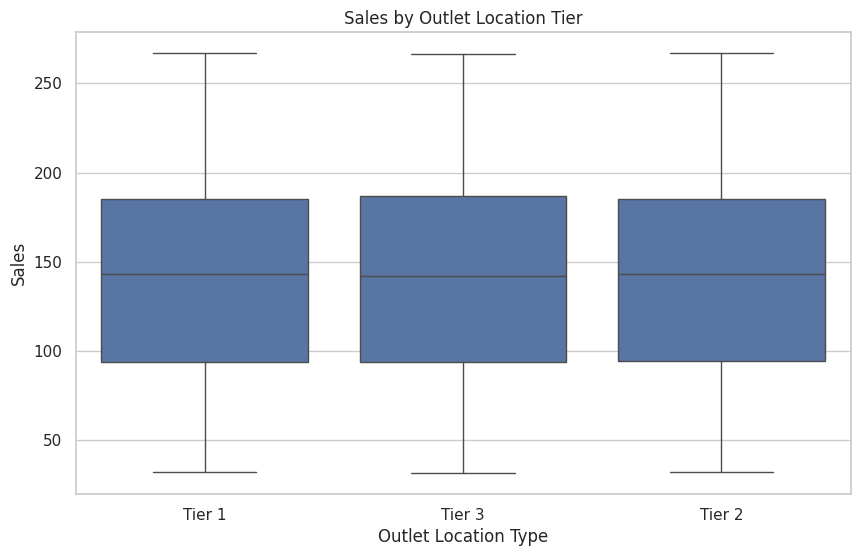

In [13]:
# 8. Sales by Location Type
sns.boxplot(data=df, x='Outlet Location Type', y='Sales')
plt.title("Sales by Outlet Location Tier")
plt.show()

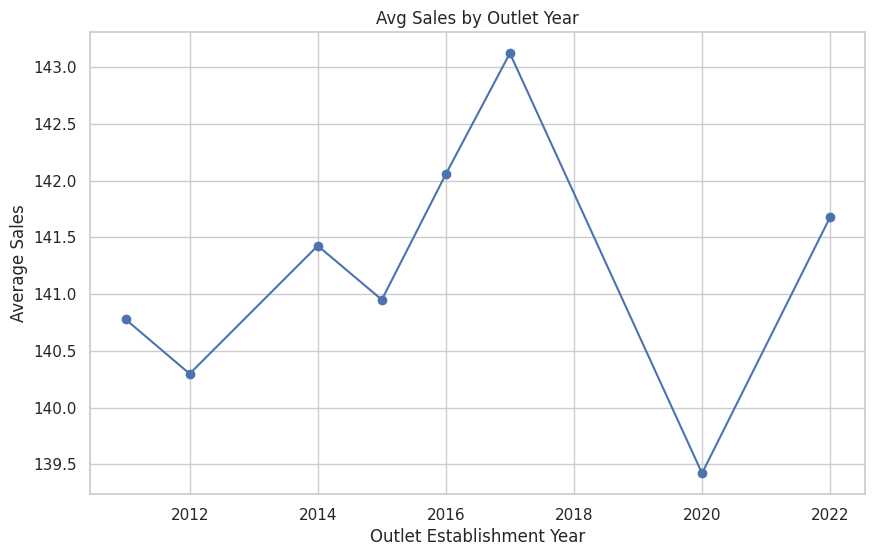

In [14]:
# 9. Sales by Establishment Year
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].mean()
sales_by_year.plot(kind='line', marker='o', title='Avg Sales by Outlet Year')
plt.ylabel("Average Sales")
plt.show()

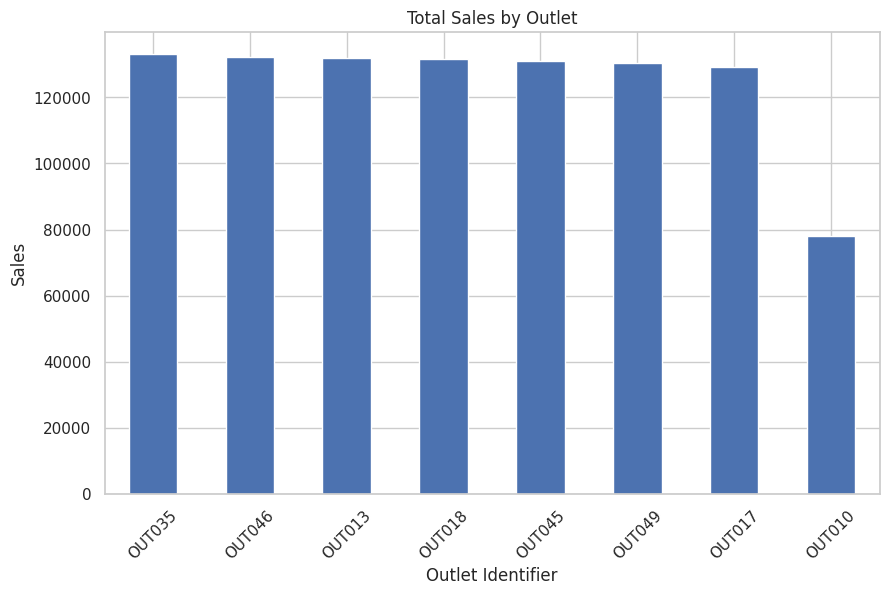

In [15]:
# 10. Sales by Outlet Identifier
sales_by_outlet = df.groupby('Outlet Identifier')['Sales'].sum().sort_values(ascending=False)
sales_by_outlet.plot(kind='bar', title='Total Sales by Outlet')
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

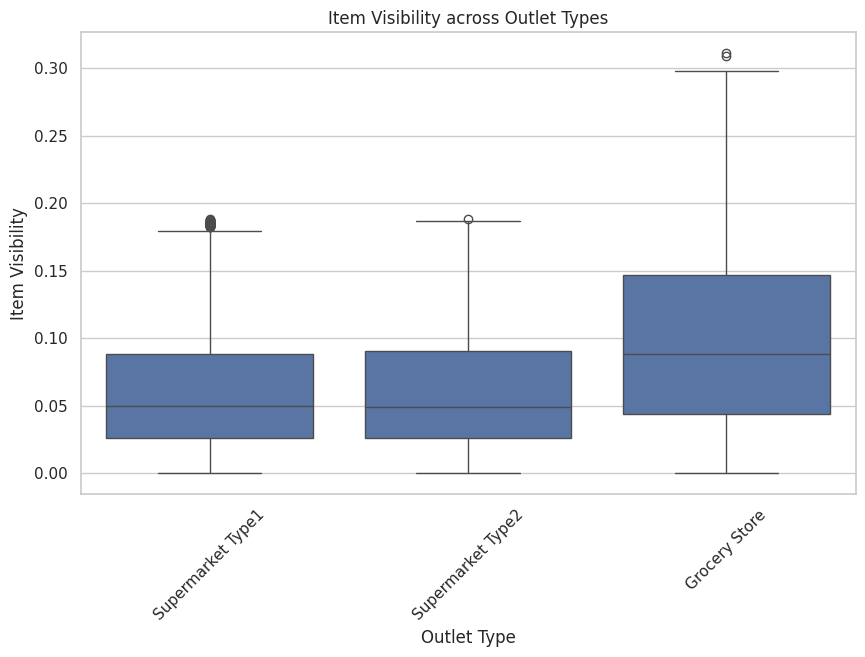

In [16]:
# 11. Visibility impact across Outlet Types
sns.boxplot(data=df, x='Outlet Type', y='Item Visibility')
plt.title("Item Visibility across Outlet Types")
plt.xticks(rotation=45)
plt.show()

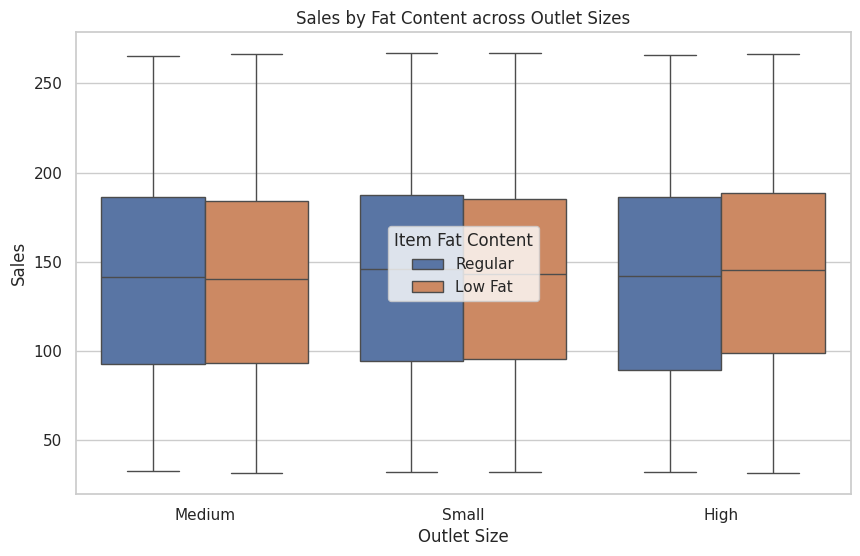

In [17]:
# 12. Fat Content impact across Outlet Sizes
sns.boxplot(data=df, x='Outlet Size', y='Sales', hue='Item Fat Content')
plt.title("Sales by Fat Content across Outlet Sizes")
plt.show()

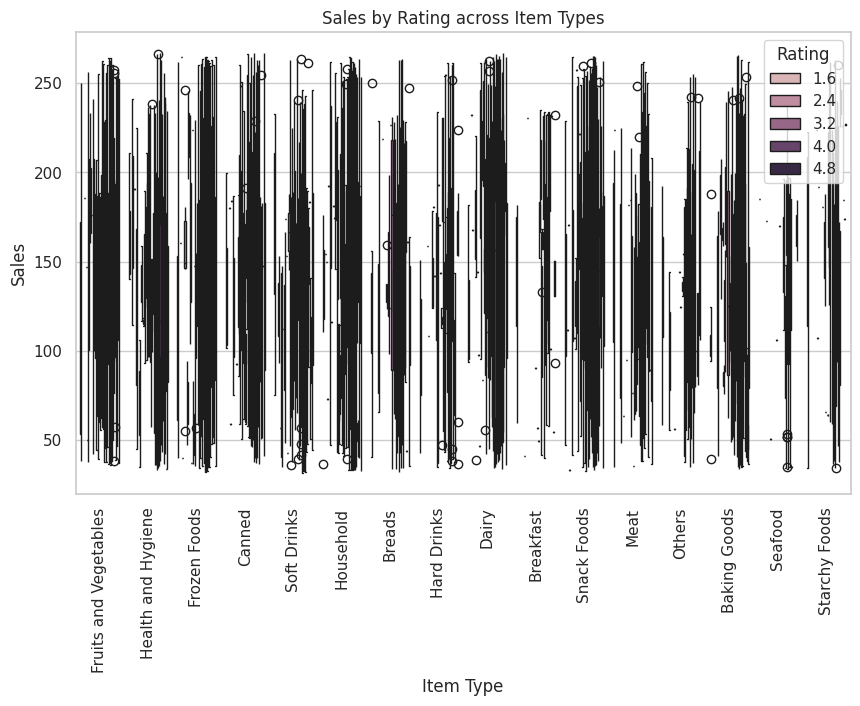

In [18]:
# 13. Ratings vs Sales by Item Type
sns.boxplot(data=df, x='Item Type', y='Sales', hue='Rating')
plt.title("Sales by Rating across Item Types")
plt.xticks(rotation=90)
plt.show()

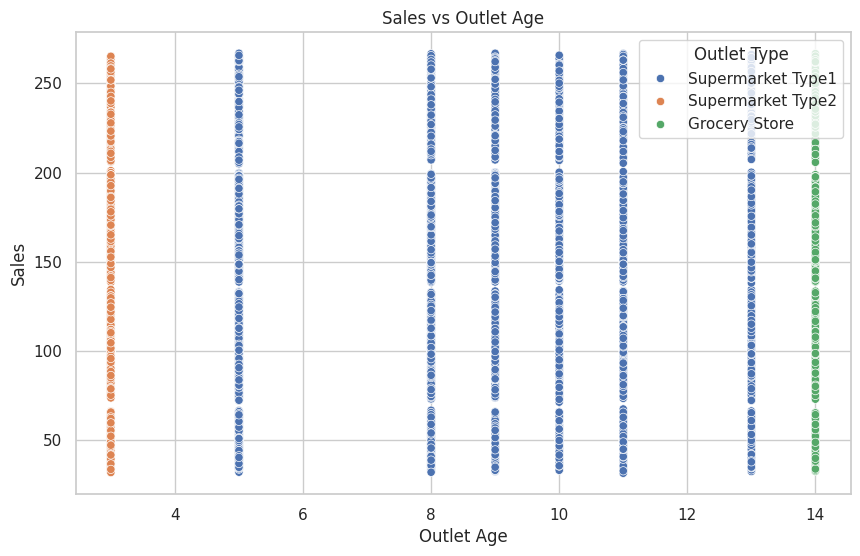

In [19]:
# 14. New vs Old Outlet Performance
df['Outlet Age'] = 2025 - df['Outlet Establishment Year']
sns.scatterplot(data=df, x='Outlet Age', y='Sales', hue='Outlet Type')
plt.title("Sales vs Outlet Age")
plt.show()

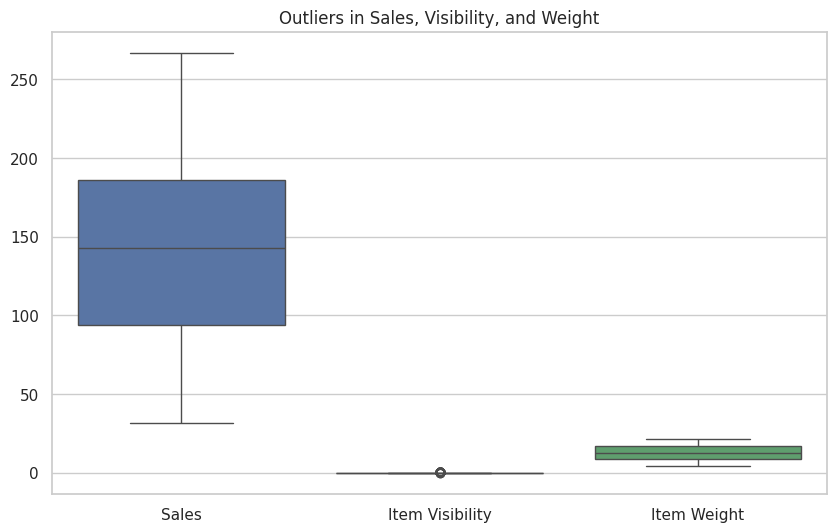

In [20]:
# 15. Outlier Detection
sns.boxplot(data=df[['Sales', 'Item Visibility', 'Item Weight']])
plt.title("Outliers in Sales, Visibility, and Weight")
plt.show()

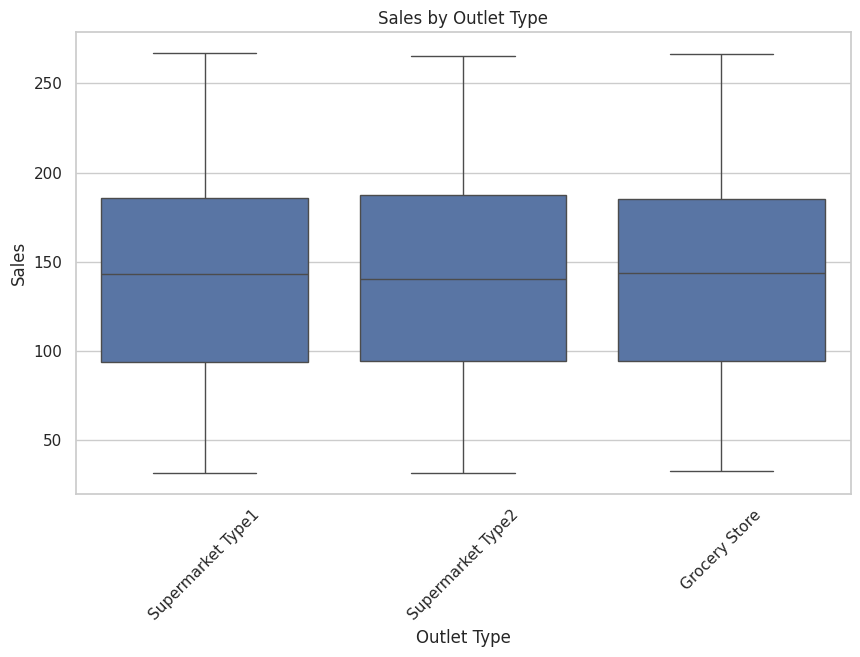

In [29]:
# Sales by Outlet Type
sns.boxplot(data=df, x='Outlet Type', y='Sales')
plt.title("Sales by Outlet Type")
plt.xticks(rotation=45)
plt.savefig("sales_by_outlet_type.png", bbox_inches='tight')
plt.show()



In [31]:
from fpdf import FPDF
import os

# Initialize PDF
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)

# Add each saved plot
for filename in sorted(os.listdir()):
    if filename.endswith('.png'):
        pdf.add_page()
        pdf.image(filename, x=10, y=20, w=180)

# Save final PDF
pdf.output("BlinkIT_EDA_Report.pdf")


''

In [32]:
from google.colab import files
files.download("BlinkIT_EDA_Report.pdf")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>